Importing Libraries

In [48]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Importing dataset

In [49]:
df=pd.read_csv("C:/Users/Me/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing

Drop customerID

In [50]:
df.drop('customerID',axis='columns',inplace=True)

Checking datatypes of columns

In [51]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [53]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Checking null values in TotalCharges

In [54]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dropping rows where TotalCharges are null

In [55]:
df=df[df.TotalCharges!=' ']

In [56]:
df[pd.to_numeric(df.TotalCharges).isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [57]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [59]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Visualising Customer Churn based on Tenure

In [60]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

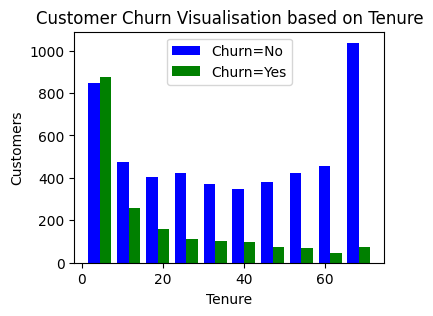

In [61]:
plt.figure(figsize=(4,3))
plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Customer Churn Visualisation based on Tenure')
plt.hist([tenure_churn_no,tenure_churn_yes],color=['blue','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

Visualising Customer Churn based on MoonthlyCharges

In [62]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges

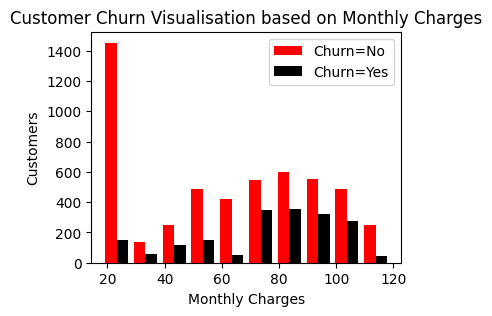

In [63]:
plt.figure(figsize=(4,3))
plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.title('Customer Churn Visualisation based on Monthly Charges')
plt.hist([mc_churn_no,mc_churn_yes],color=['red','black'],label=['Churn=No','Churn=Yes'])
plt.legend()

Checking unique values for all columns

In [64]:
for column in df:
    print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

Checking unique values for object columns

In [65]:
def check_unique(dfx):
    for column in dfx:
        if dfx[column].dtypes=='object':
            print(f'{column}:{dfx[column].unique()}')

In [66]:
check_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Replacing 'No internet service' and 'No phone service' to 'No'

In [67]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [68]:
check_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


To replce 'Yes' and 'No' with 1 and 0

In [69]:
yes_no_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
'Contract','PaperlessBilling','PaymentMethod','Churn']

In [70]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [71]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [72]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [73]:
df['gender'].unique()

array([1, 0], dtype=int64)

Using Hot Encoding where unique values more than two

In [74]:
df=pd.get_dummies(data=df,columns=['PaymentMethod','InternetService','Contract'])

In [75]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
3737,1,0,0,0,5,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4187,1,0,1,1,36,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2513,0,0,1,1,52,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [76]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [77]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Splitting of data in x and y

In [78]:
x=df.drop('Churn',axis='columns')
y=df['Churn']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [80]:
len(x_train.columns)

26

Making the model

Making 3 layers for model

In [81]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid'),
])

Compiling model

In [82]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model fitting

In [83]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 1s 3ms/step - loss: 0.5399 - accuracy: 0.7420
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.7792
Epoch 3/50
154/154 [==============================] - 1s 3ms/step - loss: 0.4331 - accuracy: 0.7999
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8027
Epoch 5/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8062
Epoch 6/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8080
Epoch 7/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8056
Epoch 8/50
154/154 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8078
Epoch 9/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8100
Epoch 10/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8106

checking loss and accuracy

In [84]:
loss,accuracy=model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7801


In [85]:
accuracy

0.7800948023796082

Making predictions

In [86]:
y_predicted=model.predict(x_test)

66/66 [==============================] - 0s 3ms/step


In [87]:
y_predicted[:5]

array([[0.26603636],
       [0.37446004],
       [0.0145367 ],
       [0.650858  ],
       [0.39176434]], dtype=float32)

In [88]:
y_test[:5]

C:\Users\Me\AppData\Local\Temp\ipykernel_13476\1754177261.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:5]


2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [89]:
y_predicted_churn=[]
for element in y_predicted:
    if element>0.5:
        y_predicted_churn.append(1)
    else:
        y_predicted_churn.append(0)

In [90]:
y_predicted_churn[:5]

[0, 0, 0, 1, 0]

Making confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predicted_churn))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1511
           1       0.67      0.45      0.54       599

    accuracy                           0.78      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Text(33.22222222222222, 0.5, 'Truth')

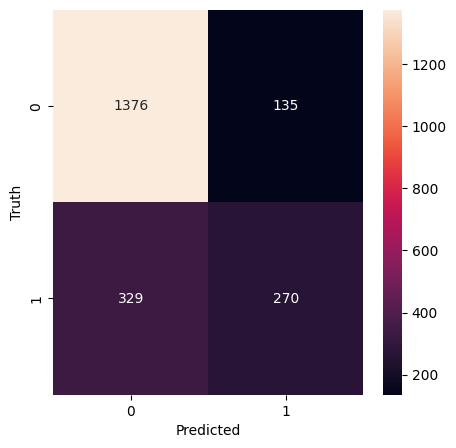

In [92]:
import seaborn as sb
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_churn)
plt.figure(figsize=(5,5))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')